In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. 


In [4]:
#se leen los archivos con los datos luego de ya realizado el ETL

df_games_eda = pd.read_parquet("./datasets/df_game_api.parquet")

df_items_eda = pd.read_parquet("./datasets/df_items_api.parquet")

df_reviews_eda = pd.read_parquet("./datasets/df_reviews_api_en.parquet")

In [10]:
# Convertir los datos de la columna 'item_id' a entero
df_reviews_eda['item_id'] = df_reviews_eda['item_id'].astype(int)

In [6]:
# Iniciamos con estadisticas descritivas de cada uno de los archivos con los datos
df_games_eda.describe(include='all') 

,genres,title,item_id,year
count,27596,27596,2.759600e+04,27557.000000
unique,856,27577,NaN,NaN
top,['action'],Soundtrack,NaN,NaN
freq,1783,3,NaN,NaN
mean,NaN,NaN,4.413095e+05,2014.866531
std,NaN,NaN,1.862026e+05,3.269931
min,NaN,NaN,1.000000e+01,1983.000000
25%,NaN,NaN,3.169638e+05,2014.000000
50%,NaN,NaN,4.369350e+05,2016.000000
75%,NaN,NaN,5.872150e+05,2017.000000


In [7]:
df_items_eda.describe(include='all') 

,user_id,item_id,playtime_forever
count,3246375,3.246375e+06,3.246375e+06
unique,68403,NaN,NaN
top,chidvd,NaN,NaN
freq,3475,NaN,NaN
mean,NaN,1.771685e+05,1.554340e+03
std,NaN,1.266635e+05,6.717381e+03
min,NaN,1.000000e+01,1.000000e+00
25%,NaN,3.912000e+04,4.400000e+01
50%,NaN,2.149500e+05,2.050000e+02
75%,NaN,2.630200e+05,8.080000e+02


In [8]:
df_reviews_eda.describe(include='all') 

,user_id,item_id,recommend,year,sentimiento_etiqueta
count,37225,37225,37225,37225.000000,37225.000000
unique,18169,2721,2,NaN,NaN
top,corthesi220,440,True,NaN,NaN
freq,10,2251,33162,NaN,NaN
mean,NaN,NaN,NaN,2014.155299,1.526259
std,NaN,NaN,NaN,0.853231,0.718986
min,NaN,NaN,NaN,2010.000000,0.000000
25%,NaN,NaN,NaN,2014.000000,1.000000
50%,NaN,NaN,NaN,2014.000000,2.000000
75%,NaN,NaN,NaN,2015.000000,2.000000


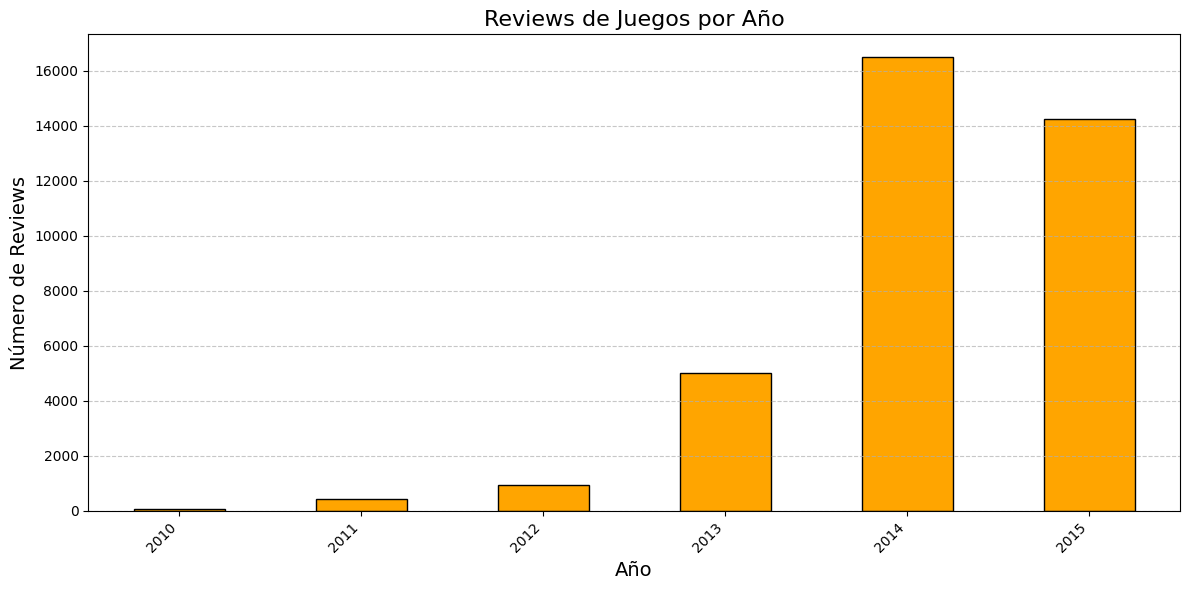

In [21]:
# Determinar la cantidad de recomendaciones por año
reviews_por_año = df_reviews_eda['year'].value_counts()

# Ordena los resultados por año
reviews_por_año = reviews_por_año.sort_index()

# Crea el gráfico de barras para revisiones por año
plt.figure(figsize=(12, 6))
reviews_por_año.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Reviews de Juegos por Año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Reviews', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

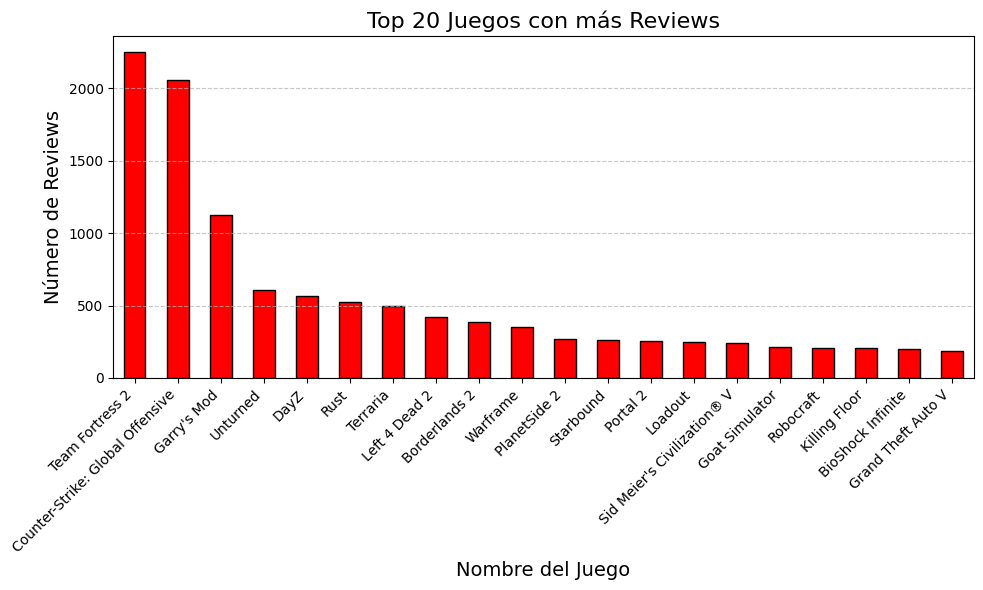

In [13]:
# Determinamos cuales son los juegos que mas reviews poseen 

# Se realiza un merge basado en la columna 'item_id'
df_merged_1 = pd.merge(df_reviews_eda, df_games_eda, on='item_id')

# Obtenemos la cuenta de revisiones por nombre de videojuego para los primeros 20 juegos
top_20_juegos = df_merged_1['title'].value_counts().head(20)

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
top_20_juegos.plot(kind='bar', color='red', edgecolor='black')  # Color rojo, borde negro
plt.title('Top 20 Juegos con más Reviews', fontsize=16)  # Título con un tamaño de fuente más grande
plt.xlabel('Nombre del Juego', fontsize=14)  # Etiqueta del eje x con un tamaño de fuente
plt.ylabel('Número de Reviews', fontsize=14)  # Etiqueta del eje y con un tamaño de fuente
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de cuadrícula horizontales punteadas
plt.tight_layout()  # Ajusta el diseño automáticamente para evitar que los elementos se superpongan
plt.show()

In [16]:
print('Numero total de juegos con revisiones en la base de datos: ', df_merged_1['title'].nunique())

Numero total de juegos con revisiones en la base de datos:  2223


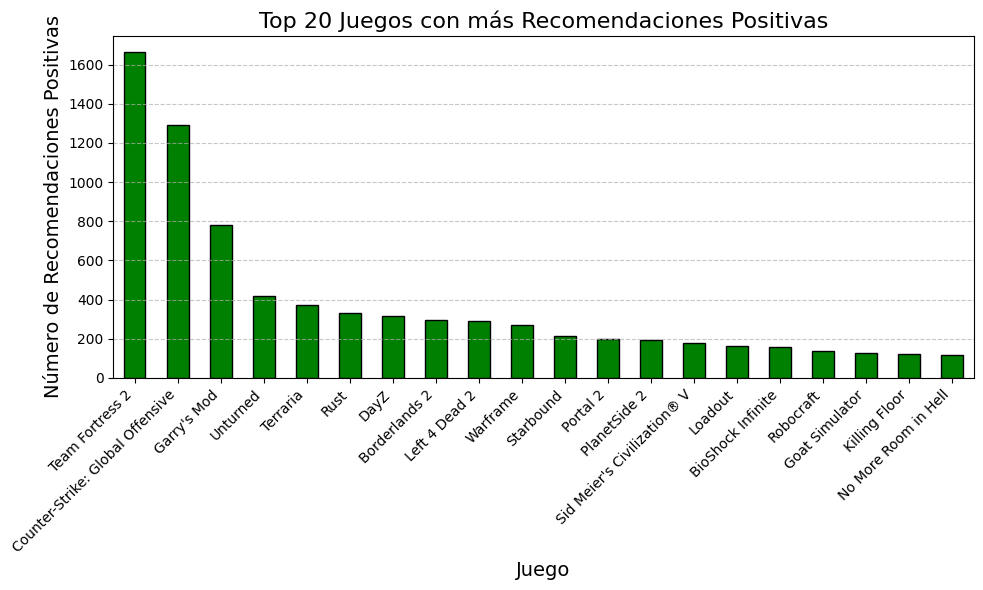

In [20]:
# Juegos con mayor cantidad de analisis de sentimientos positivos

# Filtra solo las analisis de sentimientos positivos (= 2)
revisiones_recomendadas = df_merged_1[df_merged_1['sentimiento_etiqueta'] == 2]

# Obtén la cuenta de revisiones recomendadas por juego
revisiones_por_juego = revisiones_recomendadas['title'].value_counts().head(20)

# Crea el gráfico de barras para revisiones recomendadas por juego
plt.figure(figsize=(10, 6))
revisiones_por_juego.plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 20 Juegos con más Recomendaciones Positivas', fontsize=16)
plt.xlabel('Juego', fontsize=14)
plt.ylabel('Número de Recomendaciones Positivas', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

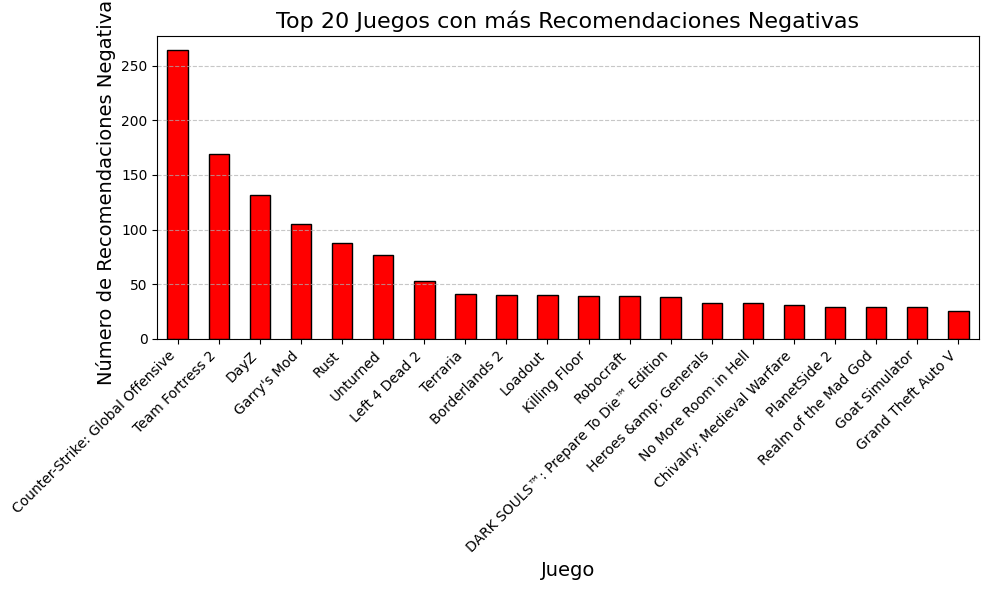

In [19]:
# Juegos con mayor cantidad de analisis de sentimientos negativos

# Filtra solo las revisiones recomendadas (número 2)
revisiones_no_recomendadas = df_merged_1[df_merged_1['sentimiento_etiqueta'] == 0]

# Obtén la cuenta de revisiones recomendadas por juego
revisiones_por_juego = revisiones_no_recomendadas['title'].value_counts().head(20)

# Crea el gráfico de barras para revisiones recomendadas por juego
plt.figure(figsize=(10, 6))
revisiones_por_juego.plot(kind='bar', color='red', edgecolor='black')
plt.title('Top 20 Juegos con más Recomendaciones Negativas', fontsize=16)
plt.xlabel('Juego', fontsize=14)
plt.ylabel('Número de Recomendaciones Negativas', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

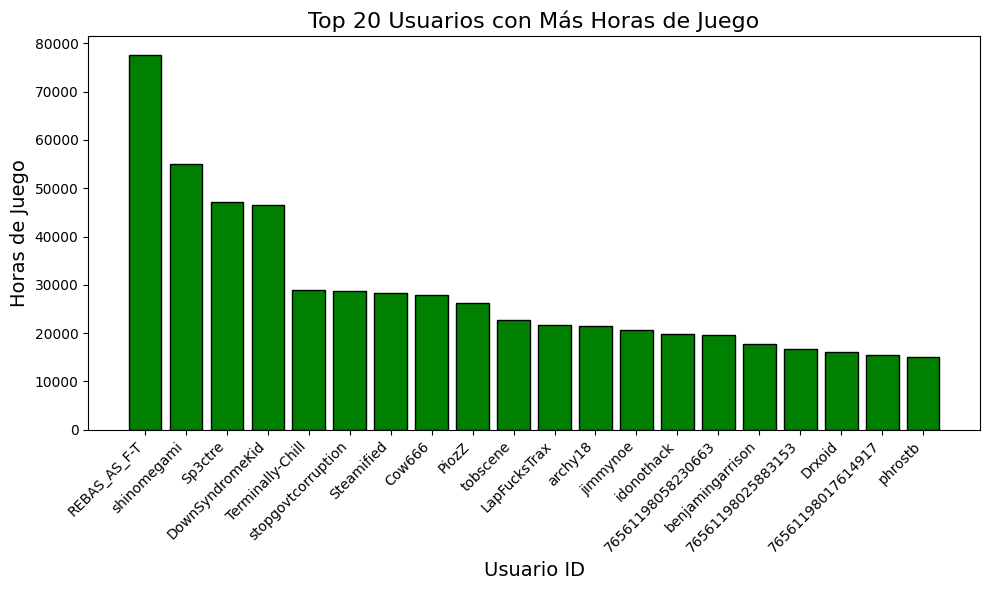

In [23]:
# Jugadores con mas horas de juego
agrupado_por_usuario = df_items_eda.groupby('user_id')['playtime_forever'].sum()/60

# Ordena el DataFrame resultante en orden descendente
usuarios_con_mas_horas = agrupado_por_usuario.sort_values(ascending=False)

# Toma los primeros 20 usuarios con más horas de juego
top_usuarios_horas = usuarios_con_mas_horas.head(20)

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_usuarios_horas.index, top_usuarios_horas, color='green', edgecolor='black')
plt.title('Top 20 Usuarios con Más Horas de Juego', fontsize=16)
plt.xlabel('Usuario ID', fontsize=14)
plt.ylabel('Horas de Juego', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

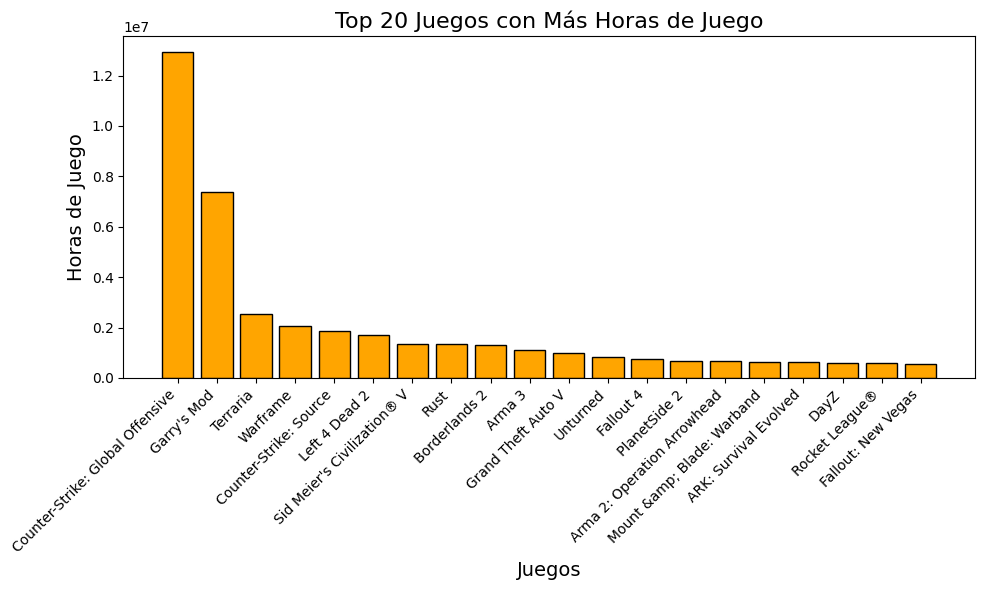

In [28]:
# Juego con mas horas de juego

# Se realiza un merge basado en la columna 'item_id'
df_merged_2 = pd.merge(df_items_eda, df_games_eda, on='item_id')

# Agrupa por 'title' y suma las horas de juego
agrupado_por_juego = df_merged_2.groupby('title')['playtime_forever'].sum()/60

# Ordena el DataFrame resultante en orden descendente
juegos_con_mas_horas = agrupado_por_juego.sort_values(ascending=False)

# Toma los primeros 20 juegos con más horas de juego
top_juegos_horas = juegos_con_mas_horas.head(20)

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_juegos_horas.index, top_juegos_horas, color='orange', edgecolor='black')
plt.title('Top 20 Juegos con Más Horas de Juego', fontsize=16)
plt.xlabel('Juegos', fontsize=14)
plt.ylabel('Horas de Juego', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()